# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [1]:
import pandas as pd
df_games=pd.read_csv('vgsales.csv')
# print(df_games)
# print(df_games.query('Genre=="Sports"').Critic_Count.describe())
# df_games=df_games.fillna('')
# df=df_games[df_games['Genre'].str.contains("trate")]

# df

Как критики относятся к спортивным играм?
проверяем гипотезу (альфа = 0,05)

H0: Критики плохо относятся к спортивным играм. Средняя оценка меньше 30 

H1: Критики хорошо относятся к спортивным играм. Средняя оценка больше 30 





In [2]:
from scipy import stats as st
alpha = 0.05
n=30
H0='Критики плохо относятся к спортивным играм. Средняя оценка меньше '+str(n)+'.'
H1='Критики хорошо относятся к спортивным играм. Средняя оценка больше '+str(n)+'.'
df=df_games.query('Genre=="Sports"')['Critic_Count'].dropna()
# print(df_games.query('Genre=="Sports"')['Critic_Count'].fillna(0))
# print(df[df!=0])

result = st.ttest_1samp(df[df!=0], n, alternative='greater')


# print(df_games.query('Genre=="Sports"').Critic_Count.mean())
print('pvalue=',result.pvalue)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу.',H1)
else:
    print('Не отвергаем нулевую нулевую гипотезу.',H0)

pvalue= 1.0
Не отвергаем нулевую нулевую гипотезу. Критики плохо относятся к спортивным играм. Средняя оценка меньше 30.


Критикам нравятся больше игры на PC или на PS4?

H0: Cредняя оценка критиков одинакова для PS4 и PC


H1: Cредняя оценка критиков различается для PS4 и PC

Ttest_indResult(statistic=6.809285412326379, pvalue=4.219690816212942e-11)
Средняя оценка для платформы PS4  38.97
Средняя оценка для платформы PС   27.92
Отвергаем нулевую гипотезу. Cредняя оценка критиков различается для PS4 и PC


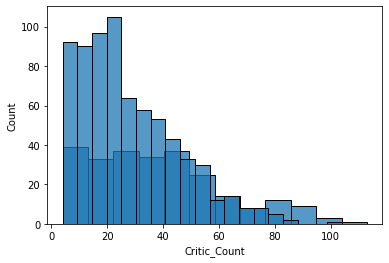

In [13]:
import seaborn as sns
H0='Cредняя оценка критиков одинакова для PS4 и PC'

H1='Cредняя оценка критиков различается для PS4 и PC'
result = st.ttest_ind(df_games.query('Platform=="PS4"')['Critic_Count'].dropna(), 
                      df_games.query('Platform=="PC"')['Critic_Count'].dropna(), equal_var=False)
print(result)

print(f'Средняя оценка для платформы PS4 ', round(df_games.query('Platform=="PS4"')['Critic_Count'].dropna().mean(),2))
print(f'Средняя оценка для платформы PС  ', round(df_games.query('Platform=="PC"')['Critic_Count'].dropna().mean(),2))
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу.',H1)
else:
    print('Не отвергаем нулевую гипотезу',H0)
sns.histplot(df_games.query('Platform=="PS4"')['Critic_Count']);
sns.histplot(df_games.query('Platform=="PC"')['Critic_Count']);

Критикам больше нравятся стрелялки или стратегии?

Ttest_indResult(statistic=5.802061441694807, pvalue=1.0668209140151195e-08)
Средняя оценка для шутеров  35.61
Средняя оценка для стратегий  28.27
Отвергаем нулевую гипотезу. Cредняя оценка критиков различается для для стрелялок и стратегий


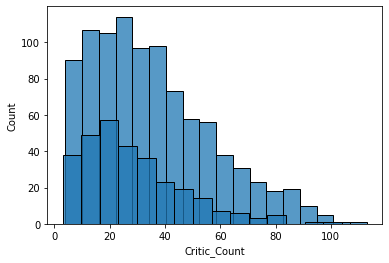

In [18]:
import seaborn as sns
H0='Cредняя оценка критиков одинакова для стрелялок и стратегий'

H1='Cредняя оценка критиков различается для для стрелялок и стратегий'
result = st.ttest_ind(df_games.query('Genre=="Shooter"')['Critic_Count'].dropna(), 
                      df_games.query('Genre=="Strategy"')['Critic_Count'].dropna(), equal_var=False)
print(result)

print(f'Средняя оценка для шутеров ',round(df_games.query('Genre=="Shooter"')['Critic_Count'].dropna().mean(),2))
print(f'Средняя оценка для стратегий ',round(df_games.query('Genre=="Strategy"')['Critic_Count'].dropna().mean(),2))
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу.',H1)
else:
    print('Не отвергаем нулевую гипотезу',H0)
sns.histplot(df_games.query('Genre=="Shooter"')['Critic_Count']);
sns.histplot(df_games.query('Genre=="Strategy"')['Critic_Count']);

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [16]:
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
tfidf = TfidfVectorizer()
stopwords_set = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()
df_spam = pd.read_csv('spam.csv')
def normal_message(row):
    message=str.lower(row.Message).split()
    message=[re.sub('[\W_]+',' ', text) for text in message]
    message=[re.sub('[\d]+',' ', text) for text in message]
    message = [word for word in  message if word not in stopwords_set]
    message = [word for word in  message if len(word)>1]
    message = [wordnet_lemmatizer.lemmatize(word) for word in message]
  
    message=(' ').join(message)
    return message

def vector_message(row):
#     vector = tfidf.transform([row.normal]).toarray()[0][0].tolist()
    vector = tfidf.transform([row.normal]).toarray()
    return vector
    
    
df_spam['normal']=df_spam.apply(normal_message,axis=1)


tfidf = TfidfVectorizer()
tfidf.fit(df_spam.normal)
df_spam['vector']=df_spam.apply(vector_message,axis=1)

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_spam.normal)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)


X=tfidf_matrix
y=df_spam.Category
# print(type(X), print(type(y)))
X_train, X_test, Y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)


classifier = LogisticRegression(solver='liblinear',random_state=0)
classifier.fit(X_train, Y_train)
predicted_y = classifier.predict(X_test)
print(f'Оценка модели {round(classifier.score(X_test, y_test),2)}')


Оценка модели 0.96


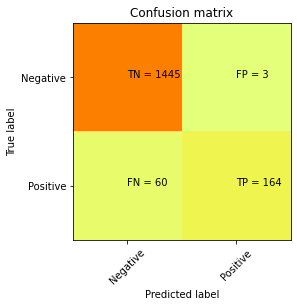

In [17]:
import matplotlib.pyplot as plt
import numpy as np
cf=confusion_matrix(y_test, predicted_y)
tn, fp, fn, tp = confusion_matrix(y_test, predicted_y).ravel()

plt.clf()
plt.imshow(cf, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cf[i][j]))
plt.show()

In [18]:

df_result=pd.DataFrame([y_test.index,y_test.values,predicted_y]).T
df_result.columns=['index','real','predict']
df_diff=df_result.query('real!=predict').set_index('index')
df_diff=df_diff.join(df_spam.reset_index(),on='index')
print(f'Датафрейм, с исходными текстами в количестве  {df_diff.count()[0]} сообщений, классифицированные неправильно')
print(df_diff[['predict','Category','Message']])
# df_diff[['predict','Category','Message']].to_csv('result.csv')


Датафрейм, с исходными текстами в количестве  63 сообщений, классифицированные неправильно
      predict Category                                            Message
index                                                                    
881       ham     spam  Reminder: You have not downloaded the content ...
1961      ham     spam  Guess what! Somebody you know secretly fancies...
3864      ham     spam  Oh my god! I've found your number again! I'm s...
2575      ham     spam  Your next amazing xxx PICSFREE1 video will be ...
3548      ham     spam  Rock yr chik. Get 100's of filthy films &XXX p...
...       ...      ...                                                ...
4543      ham     spam  FreeMsg Hi baby wow just got a new cam moby. W...
752       ham     spam  You have an important customer service announc...
309       ham     spam  TheMob> Check out our newest selection of cont...
495      spam      ham                   Are you free now?can i call now?
305       ham     spa

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам?
Прежде чем задать вопрос необходимо попробовать найти ответ самому в интернете. Навык самостоятельного поиска информации – один из важнейших, и каждый практикующий специалист любого уровня это делает каждый день.

Любой вопрос должен быть сформулирован по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности, прикрепляйте к вопросу скриншоты, либо ссылки на код. Оставляйте только проблемный и воспроизводимый участок кода, все решение выкладывать не допускается.


In [4]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True